# RQ2

#### [RQ2] What are the time slots with more passengers? Set your own time slots and discover which are those when Taxis drive the highest number of passengers overall New York and repeat the analysis for each borough. Provide the results through a visualization and comment them.

In [26]:
import pandas as pd
import numpy as np
from datetime import datetime
import time

%matplotlib inline


import matplotlib.pyplot as plt

from sys import getsizeof as get

In [27]:
df = pd.read_csv(r"C:\Users\samin\Desktop\Homework2\Data\yellow_tripdata_2018-01.csv")

In [28]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.5,1,N,41,24,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80
1,1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.7,1,N,239,140,2,14.0,0.5,0.5,0.00,0.0,0.3,15.30
2,1,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.8,1,N,262,141,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30
3,1,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.2,1,N,140,257,2,33.5,0.5,0.5,0.00,0.0,0.3,34.80
4,1,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.5,1,N,246,239,1,12.5,0.5,0.5,2.75,0.0,0.3,16.55


In [29]:
#Read taxi_zone_lookup.csv
#We call the dataframe created borough.
#This data frame will be merged later
borough = pd.read_csv(r"C:\Users\samin\Desktop\Homework2\taxi_zone_lookup.csv")

# Data Cleaning

In [30]:
#Keep the columns we need by filtering and drop the rest.
#We have chosen the pickup Locations
sdf = df.filter(['tpep_pickup_datetime', 'passenger_count', 'PULocationID'])

In [31]:
sdf.head()


,tpep_pickup_datetime,passenger_count,PULocationID
0,2018-01-01 00:21:05,1,41
1,2018-01-01 00:44:55,1,239
2,2018-01-01 00:08:26,2,262
3,2018-01-01 00:20:22,1,140
4,2018-01-01 00:09:18,2,246


In [32]:
#Delete the the initial dataframe to free some memory
del df

In [9]:
#Check if there are any NaN values
sdf.isnull().any().any()

False

In [34]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 3 columns):
tpep_pickup_datetime    object
passenger_count         int64
PULocationID            int64
dtypes: int64(2), object(1)
memory usage: 200.5+ MB


In [37]:
sdf['datetime'] = pd.to_datetime(sdf['tpep_pickup_datetime'])

In [38]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759874 entries, 0 to 8759873
Data columns (total 4 columns):
tpep_pickup_datetime    object
passenger_count         int64
PULocationID            int64
datetime                datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 267.3+ MB


In [40]:
#Now that we have a new column called 'datetime' with the type datetime64, we drop 'tpep_pickup_datetime'.
sdf = sdf.drop(['tpep_pickup_datetime'], axis=1)

### Datetime 

In [41]:
# extract year and month to check if each row contains the right values: year 2018 and month 1(January) 
# extract hour in order to create the time slots

sdf['Year'] = pd.DatetimeIndex(sdf['datetime']).year
sdf['Month'] = pd.DatetimeIndex(sdf['datetime']).month
sdf['Day'] = pd.DatetimeIndex(sdf['datetime']).day
sdf['Hour'] = pd.DatetimeIndex(sdf['datetime']).hour

In [42]:
sdf.head()

,passenger_count,PULocationID,datetime,Year,Month,Day,Hour
0,1,41,2018-01-01 00:21:05,2018,1,1,0
1,1,239,2018-01-01 00:44:55,2018,1,1,0
2,2,262,2018-01-01 00:08:26,2018,1,1,0
3,1,140,2018-01-01 00:20:22,2018,1,1,0
4,2,246,2018-01-01 00:09:18,2018,1,1,0


In [43]:
#Drop 'datetime'
#Data has been extracted out of it so we don't need this column anymore
sdf = sdf.drop(columns=['datetime'])

In [44]:
sdf.head()

,passenger_count,PULocationID,Year,Month,Day,Hour
0,1,41,2018,1,1,0
1,1,239,2018,1,1,0
2,2,262,2018,1,1,0
3,1,140,2018,1,1,0
4,2,246,2018,1,1,0


In [45]:
#Doing some data cleaning: checking to see if year=2018, Month=1, 1<=day<=31 and 0<=hour<=23
#We use groupby function to see the groups in each of these columns

sdf.groupby('Year').count()

,passenger_count,PULocationID,Month,Day,Hour
Year,,,,,
2001,1,1,1,1,1
2002,5,5,5,5,5
2003,5,5,5,5,5
2008,11,11,11,11,11
2009,17,17,17,17,17
2017,226,226,226,226,226
2018,8759609,8759609,8759609,8759609,8759609


In [ ]:
#Other than year=2018, we have rows with year=2001, 2002, 2003, 2008, 2009 and 2017
#We drop these rows

In [48]:
#Drop those rows containing years other than 2018
sdf = sdf.drop(sdf[(sdf.Year == 2017) | (sdf.Year == 2019) | (sdf.Year == 2008) | (sdf.Year == 2003) | (sdf.Year == 2002) | (sdf.Year == 2001)].index)
sdf.shape

(8759626, 6)

In [49]:
#Checking if the Month column is clean aka Month=1
sdf.groupby('Month').count()

,passenger_count,PULocationID,Year,Day,Hour
Month,,,,,
1,8759549,8759549,8759549,8759549,8759549
2,71,71,71,71,71
7,6,6,6,6,6


In [52]:
#Drop those rows containing Months other than January(1)
sdf = sdf.drop(sdf[(sdf.Month == 2) | (sdf.Month == 7)].index)
sdf.shape

(8759549, 6)

In [53]:
#Check the Day column
sdf.groupby('Day').count()

,passenger_count,PULocationID,Year,Month,Hour
Day,,,,,
1,237135,237135,237135,237135,237135
2,238152,238152,238152,238152,238152
3,266992,266992,266992,266992,266992
4,122222,122222,122222,122222,122222
5,265212,265212,265212,265212,265212
6,281260,281260,281260,281260,281260
7,237393,237393,237393,237393,237393
8,259792,259792,259792,259792,259792
9,284662,284662,284662,284662,284662


In [54]:
#Day column seems alright
#We check the hour column
sdf.groupby('Hour').count()

,passenger_count,PULocationID,Year,Month,Day
Hour,,,,,
0,259266,259266,259266,259266,259266
1,188644,188644,188644,188644,188644
2,142074,142074,142074,142074,142074
3,102588,102588,102588,102588,102588
4,79349,79349,79349,79349,79349
5,86213,86213,86213,86213,86213
6,196989,196989,196989,196989,196989
7,335644,335644,335644,335644,335644
8,418283,418283,418283,418283,418283


In [ ]:
#Hour column seems fine too

In [59]:
#Now based on our Research question in hand(RQ2), we won't need these columns: Year, Month and Day.
#We drop them
#sdf = sdf.drop(['Month', 'Day', 'Year'], axis=1)


In [60]:
sdf.head()

,passenger_count,PULocationID,Hour
0,1,41,0
1,1,239,0
2,2,262,0
3,1,140,0
4,2,246,0


In [61]:
#passenger_count gives us the number of passenger in each car
#We go about cleaning this column based on this information presented in the yellow taxi's website:
#The maximum number of passengers allowed in a yellow taxicab by law is four (4) in a four (4) passenger taxicab or
#five (5) passengers in a five (5) passenger taxicab, 
#except that an additional passenger must be accepted if such passenger is under the age of seven (7) and 
#is held on the lap of an adult passenger seated in the rear."
#So, we see that 1<=passenger count<=6

sdf.groupby('passenger_count').count()

,PULocationID,Hour
passenger_count,,
0,59269,59269
1,6248644,6248644
2,1271554,1271554
3,351897,351897
4,163555,163555
5,414441,414441
6,250102,250102
7,38,38
8,24,24


In [63]:
#We drop those rows with passenger_count=7, 8, 9 and 0
sdf = sdf.drop(sdf[(sdf.passenger_count == 7) | (sdf.passenger_count == 8) | (sdf.passenger_count == 9) | (sdf.passenger_count == 0)].index)
sdf.shape

(8700193, 3)

#### Merge two datasets

In [ ]:
#In sdf dataframe, we have a column that contains the number of zones in each borough. 
#In order to get the name of the boroughs, we need to merge sdf with another dataset available (taxi_zone_lookup.csv)
#We read this dataset with pd.read_csv() and called the dataframe borough

In [65]:
result = pd.merge(sdf,
                 borough[['LocationID', 'Borough']],
                 left_on='PULocationID',
                 right_on='LocationID',
                 how='inner' 
                 )
result.head()
del sdf

In [66]:
#Drop 'LocationID' and 'PULocationID'
result = result.drop(['PULocationID', 'LocationID'], axis =1)

In [67]:
result.head()

,passenger_count,Hour,Borough
0,1,0,Manhattan
1,1,0,Manhattan
2,2,0,Manhattan
3,1,0,Manhattan
4,1,0,Manhattan


In [68]:
result.describe()

,passenger_count,Hour
count,8.700193e+06,8.700193e+06
mean,1.617720e+00,1.372313e+01
std,1.255546e+00,6.076566e+00
min,1.000000e+00,0.000000e+00
25%,1.000000e+00,9.000000e+00
50%,1.000000e+00,1.400000e+01
75%,2.000000e+00,1.900000e+01
max,6.000000e+00,2.300000e+01


In [ ]:
#Checking the Boroughs
#In NYC, there are six boroughs: Bronx, Brooklyn, Manhattan, Staten Island, Queens

In [69]:
result.groupby('Borough').count()

,passenger_count,Hour
Borough,,
Bronx,7278,7278
Brooklyn,99585,99585
EWR,553,553
Manhattan,7914563,7914563
Queens,523765,523765
Staten Island,143,143
Unknown,154306,154306


In [71]:
#We see two unexpected names in Broughs category: EWR which an airport near Queens and Unknown
#We drop the rows with borough=Unknown or borough=EWR
result = result.drop(result[(result.Borough == 'EWR') | (result.Borough == 'Unknown')].index)
result.shape

(8545334, 3)

In [397]:
#changing column names
#result.columns = ['datetime', 'NumofPassenger', 'Borough']

#### Defining Time-slots

In [72]:
result.head()

,passenger_count,Hour,Borough
0,1,0,Manhattan
1,1,0,Manhattan
2,2,0,Manhattan
3,1,0,Manhattan
4,1,0,Manhattan


In [76]:
#To define a time slot (and probably labeling it) we use pandas function .cut (pd.cut())
result=result.assign(
    timeSlot=pd.cut(
        result['Hour'],
        [-1, 8, 12, 18, 20, 23],
        labels=['0-8', '8-12', '12-18', '18-20', '20-23']))

#result = result.drop(['Hour'], axis=1)

In [75]:
result.head()

,passenger_count,Hour,Borough,timeOfDay
0,1,0,Manhattan,0-8
1,1,0,Manhattan,0-8
2,2,0,Manhattan,0-8
3,1,0,Manhattan,0-8
4,1,0,Manhattan,0-8


In [82]:
df=result.groupby(['timeSlot'])['passenger_count'].sum()

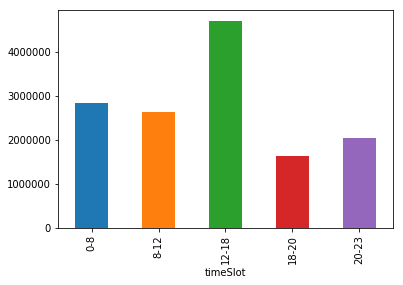

In [83]:
df.plot.bar()

In [86]:
df1 = result.groupby(['timeSlot', 'Borough'])['passenger_count'].sum()

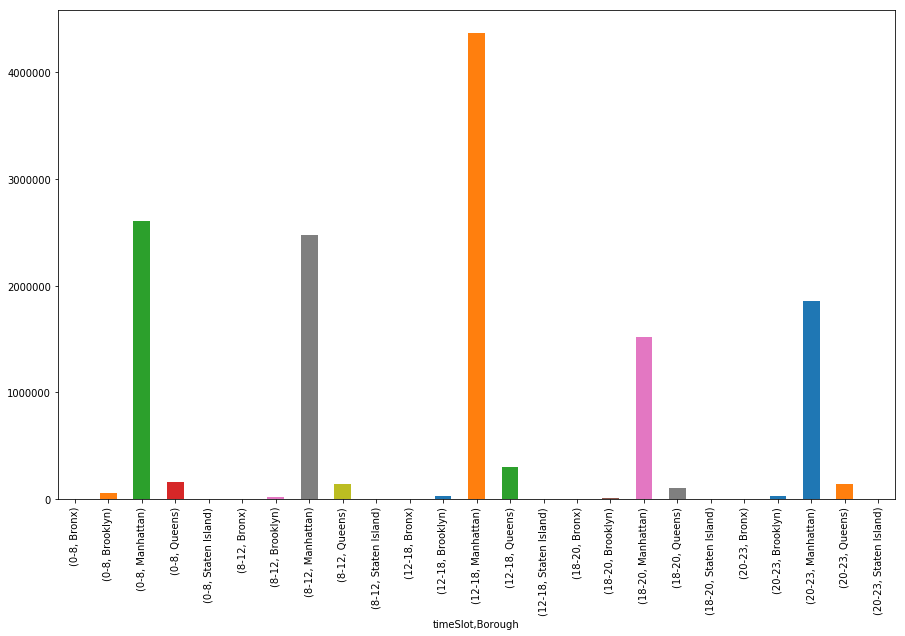

In [93]:
df1.plot.bar(figsize = (15, 9))